Bofore optimizatoin

In [2]:
# step1: import package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [11]:
# step2: load dataset
df = pd.read_csv('C:/Users/34337/OneDrive/桌面/UA/Courses/MIS 545/Group Project/Week 25 College Tuition 1966 - 2017_v3.csv')

In [12]:
# step3: show the first 5 rows of the dataset
df.head()

,Institution Type,Year,School Type,Total (Inflation Adjusted),Tuition & Fees (Inflation Adjusted),Room (Inflation Adjusted),Board (Inflation Adjusted),Total,Tuition & Fees,Room,Board
0,All Institutions,1966-67,All (4 and 2 Year Institutions),10387.48858,4326.573312,2476.106063,3584.809208,1378.029556,573.973762,328.486266,475.569528
1,All Institutions,1967-68,All (4 and 2 Year Institutions),10324.92331,4286.652333,2495.184685,3543.086290,1415.127765,587.525985,341.988509,485.613271
2,All Institutions,1968-69,All (4 and 2 Year Institutions),10147.16848,4148.525498,2506.262771,3492.380210,1458.609973,596.331940,360.264036,502.013997
3,All Institutions,1969-70,All (4 and 2 Year Institutions),10247.15328,4237.619973,2556.655018,3452.878293,1560.038913,645.140350,389.228228,525.670335
4,All Institutions,1970-71,All (4 and 2 Year Institutions),10322.80818,4297.450799,2615.996029,3409.361356,1652.682730,688.022348,418.821253,545.839130


In [13]:
# step 4: show the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Institution Type                     468 non-null    object 
 1   Year                                 468 non-null    object 
 2   School Type                          468 non-null    object 
 3   Total (Inflation Adjusted)           468 non-null    float64
 4   Tuition & Fees (Inflation Adjusted)  468 non-null    float64
 5   Room (Inflation Adjusted)            468 non-null    float64
 6   Board (Inflation Adjusted)           468 non-null    float64
 7   Total                                468 non-null    float64
 8   Tuition & Fees                       468 non-null    float64
 9   Room                                 468 non-null    float64
 10  Board                                468 non-null    float64
dtypes: float64(8), object(3)
memory 

In [14]:
# step 5: Extract the first 4 digits from the "Year" column
df['Year'] = df['Year'].str[:4]
# shoe the first 5 rows of the dataset again to check the change
df.head()

,Institution Type,Year,School Type,Total (Inflation Adjusted),Tuition & Fees (Inflation Adjusted),Room (Inflation Adjusted),Board (Inflation Adjusted),Total,Tuition & Fees,Room,Board
0,All Institutions,1966,All (4 and 2 Year Institutions),10387.48858,4326.573312,2476.106063,3584.809208,1378.029556,573.973762,328.486266,475.569528
1,All Institutions,1967,All (4 and 2 Year Institutions),10324.92331,4286.652333,2495.184685,3543.086290,1415.127765,587.525985,341.988509,485.613271
2,All Institutions,1968,All (4 and 2 Year Institutions),10147.16848,4148.525498,2506.262771,3492.380210,1458.609973,596.331940,360.264036,502.013997
3,All Institutions,1969,All (4 and 2 Year Institutions),10247.15328,4237.619973,2556.655018,3452.878293,1560.038913,645.140350,389.228228,525.670335
4,All Institutions,1970,All (4 and 2 Year Institutions),10322.80818,4297.450799,2615.996029,3409.361356,1652.682730,688.022348,418.821253,545.839130


In [15]:
# step 6: change the data type of the column 'Year' to int
df['Year'] = df['Year'].astype('int')
# show the data type of each column again to check the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Institution Type                     468 non-null    object 
 1   Year                                 468 non-null    int32  
 2   School Type                          468 non-null    object 
 3   Total (Inflation Adjusted)           468 non-null    float64
 4   Tuition & Fees (Inflation Adjusted)  468 non-null    float64
 5   Room (Inflation Adjusted)            468 non-null    float64
 6   Board (Inflation Adjusted)           468 non-null    float64
 7   Total                                468 non-null    float64
 8   Tuition & Fees                       468 non-null    float64
 9   Room                                 468 non-null    float64
 10  Board                                468 non-null    float64
dtypes: float64(8), int32(1), object(

In [16]:
# step 7: Preprocess data
# Convert Institution Type into categorical values using the .astype().cat.codes method
df['Institution Type'] = df['Institution Type'].astype('category').cat.codes
# Convert 'Institution Type' into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Institution Type'])
print(df.columns)

Index(['Year', 'School Type', 'Total (Inflation Adjusted)',
       'Tuition & Fees (Inflation Adjusted)', 'Room (Inflation Adjusted)',
       'Board (Inflation Adjusted)', 'Total', 'Tuition & Fees', 'Room',
       'Board', 'Institution Type_0', 'Institution Type_1',
       'Institution Type_2'],
      dtype='object')


In [17]:
# step 8: Split the data
# Split the data into features (X) and target variable (y)
# Use the new column names generated by one-hot encoding
X = df[['Institution Type_0', 'Institution Type_1', 'Institution Type_2', 'Year']]
y = df['Tuition & Fees (Inflation Adjusted)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# step 9: Create and train a decision tree regressor model
# Create a decision tree regressor model
model = DecisionTreeRegressor()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
mape = 100 * (abs(y_test - y_pred) / y_test).mean()  # Calculate MAPE
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Squared Error: 23139588.133686397
Root Mean Squared Error: 4810.362578193706
Mean Absolute Percentage Error: 56.11%


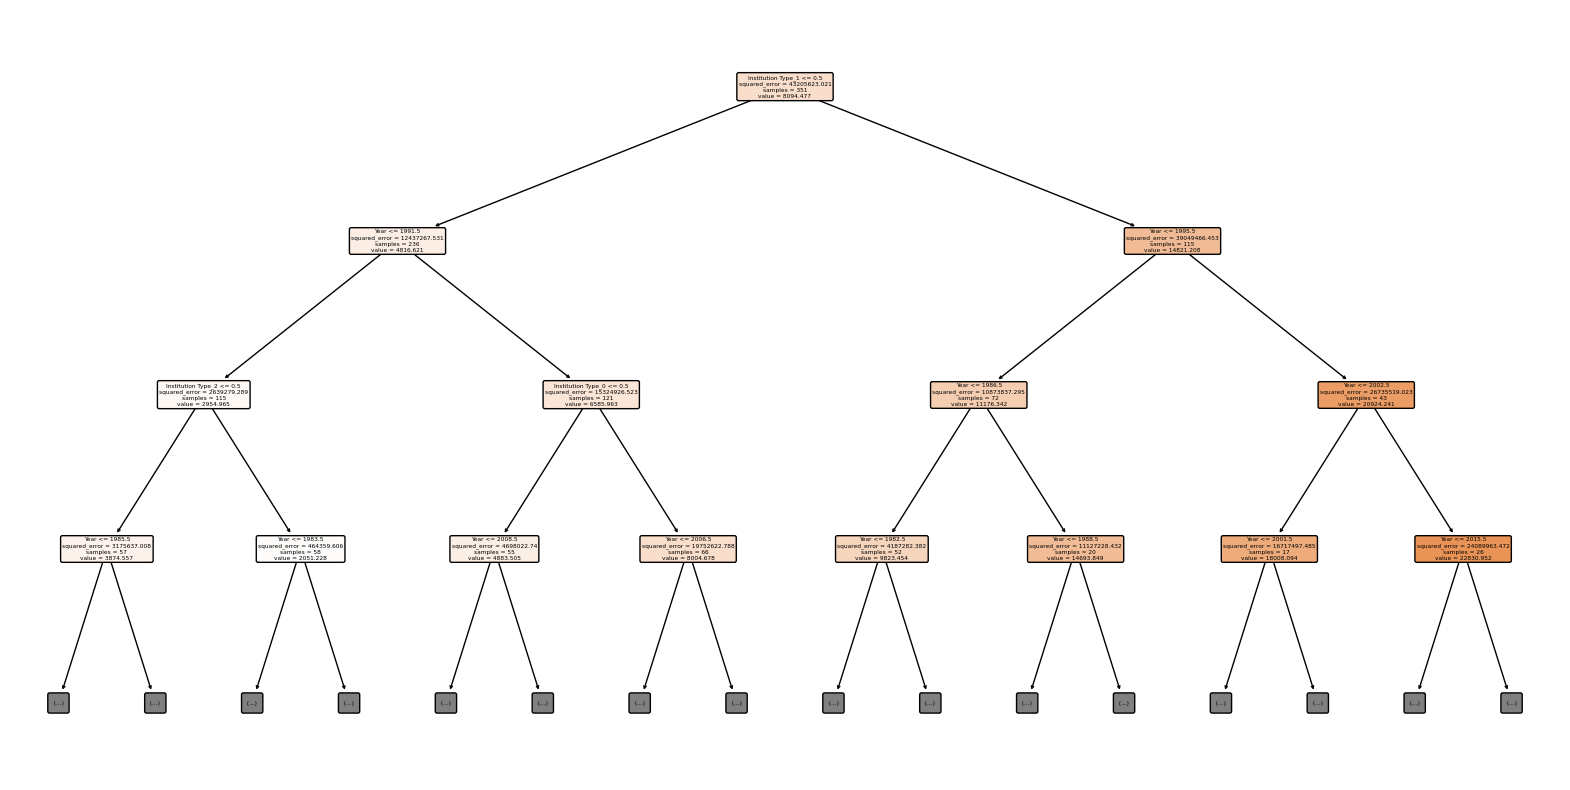

In [19]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.show()

Optimization - Adjusting max_depth and min_samples_leaf with loop

In [20]:
# load dataset
df6 = pd.read_csv('C:/Users/34337/OneDrive/桌面/UA/Courses/MIS 545/Group Project/Week 25 College Tuition 1966 - 2017_v3.csv')

In [21]:
# Data Preprocessing

# Extract the first 4 digits from the "Year" column
df6['Year'] = df6['Year'].str[:4]
# change the data type of the column 'Year' to int
df6['Year'] = df6['Year'].astype('int')
# Convert Institution Type into categorical values using the .astype().cat.codes method
df6['Institution Type'] = df6['Institution Type'].astype('category').cat.codes
# Convert 'Institution Type' into numerical using one-hot encoding
df6 = pd.get_dummies(df6, columns=['Institution Type'])
print(df6.columns)

Index(['Year', 'School Type', 'Total (Inflation Adjusted)',
       'Tuition & Fees (Inflation Adjusted)', 'Room (Inflation Adjusted)',
       'Board (Inflation Adjusted)', 'Total', 'Tuition & Fees', 'Room',
       'Board', 'Institution Type_0', 'Institution Type_1',
       'Institution Type_2'],
      dtype='object')


In [22]:
# Split the data into features (X) and target variable (y)
# Use the new column names generated by one-hot encoding
X6 = df6[['Institution Type_0', 'Institution Type_1', 'Institution Type_2', 'Year']]
y6 = df6['Tuition & Fees (Inflation Adjusted)']
# Split the data into training and testing sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.25, random_state=42)

In [23]:
# Define ranges of values for max_depth and min_samples_leaf to test
max_depth_values = range(1, 100)  # Adjust the range as needed
min_samples_leaf_values = range(1, 100)  # Adjust the range as needed

# Initialize variables to store the best model and its corresponding MSE
best_model = None
best_mse = float('inf')  # Initialize with a high value

In [24]:
# Loop through max_depth and min_samples_leaf values and train models
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Create a Decision Tree model with the current max_depth and min_samples_leaf
        model6 = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        
        # Fit the model to the training data
        model6.fit(X6_train, y6_train)
        
        # Make predictions on the test set
        y6_pred = model6.predict(X6_test)
        
        # Calculate MSE for the current model
        mse6 = mean_squared_error(y6_test, y6_pred)
        
        # Check if the current model has a lower MSE
        if mse6 < best_mse:
            best_mse = mse6
            best_model = model6

In [25]:
# Print the best hyperparameter values and corresponding MSE
print(f'Best max_depth: {best_model.max_depth}')
print(f'Best min_samples_leaf: {best_model.min_samples_leaf}')
print(f'Best MSE: {best_mse}')
# Evaluate the model
rmse6 = best_mse**0.5 # Calculate RMSE
mape6 = 100 * (abs(y6_test - y6_pred) / y6_test).mean()  # Calculate MAPE
print(f'Root Mean Squared Error: {rmse6}')
print(f'Mean Absolute Percentage Error: {mape6:.2f}%')

Best max_depth: 5
Best min_samples_leaf: 18
Best MSE: 10418635.582716983
Root Mean Squared Error: 3227.7911305902344
Mean Absolute Percentage Error: 59.73%


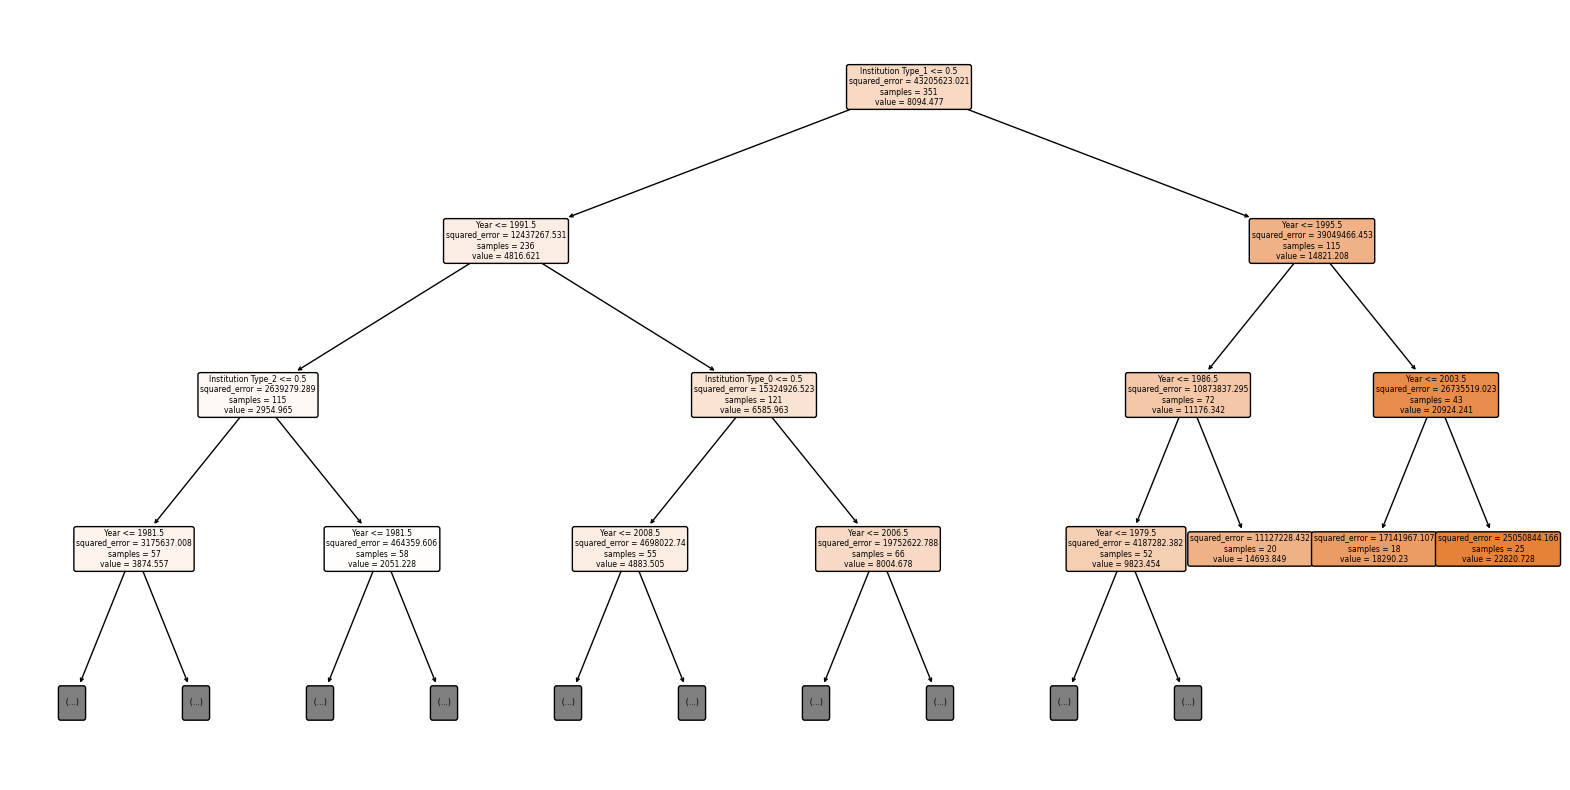

In [26]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.show()